In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib notebook

# Tarefa 1

#### Através de uma implementação, aumente o brilho de uma imagem e pinte faixas pretas verticais:

In [2]:
img = cv2.imread('cat.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [3]:
def improve_brightness(image, value):
    img = image.astype(int).copy()
    img += value
    img[img > 255] = 255
    return img.astype(np.uint8)

In [4]:
def print_img(img):
    plt.imshow(img.astype(np.uint8), cmap='gray')
    plt.title('Result')
    plt.axis('off')
    plt.show()

In [5]:
b = improve_brightness(gray, 100)
#print_img(gray)
#print_img(b)

In [6]:
def draw_strips(image, spacing, width):
    img = image.copy()
    h, w = img.shape
    col = []
    actual = 0
    while actual < w:
        col += [True for x in range(width)]
        col += [False for x in range(spacing)]
        actual += width + spacing 
    img[:,col] = 0
    return img

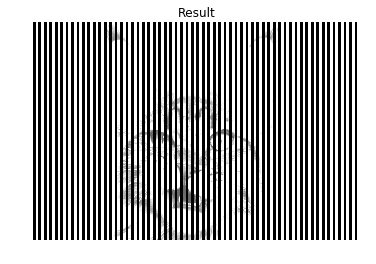

In [7]:
s = draw_strips(b,5,5)
print_img(s)

#### Através de outra implementação, aplique um filtro de suavização para aproximar a imagem original.

In [8]:
def blur(image, conv_m_size):
    img = image.copy()
    h, w = img.shape
    wrap = np.ones((h + conv_m_size, w + conv_m_size), dtype=np.uint8)
    wrap = img.mean() * wrap
    pad = conv_m_size//2
    wrap[pad :pad + h,pad:pad + w ] = img
    for i in range(h):
        for j in range(w):
            img[i,j] = np.sum(wrap[i:i + pad, j:j+pad] * 1)//((pad *2) ** 2) 
    return img

    

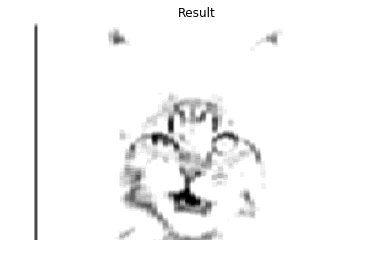

In [9]:
x = blur(s, 20)
print_img(x)

## 2

In [10]:
def conv_point(image, kernell, y,x, _min, _max):
    h, w = image.shape
    pad = kernell.shape[0]//2
    k_r = np.zeros_like(kernell, dtype=int)
    
    for i_k,i in enumerate(range(y - pad, y + pad + 1)):
        for j_k, j in enumerate(range(x - pad, x + pad + 1)):
            if i >= 0 and j >=0 and i < h and j < w:
                k_r[i_k, j_k] = kernell[i_k, j_k] * image[i,j]
    #print(k_r)
    return (int)(255 * ((np.sum(k_r) - _min) / (_max - _min))) 
        
def conv(image, kernell, _min, _max):
    img = image.astype(int).copy()
    h, w = img.shape
    for i in range(h):
        for j in range(w):
            img[i,j] = conv_point(image, kernell, i,j, _min, _max)
            #print(img[i,j])
    return img

In [11]:
x = np.array([[2,3,5], [1,4,1], [2,5,4]])
k = np.array([[1,2,1], [2,4,2], [1,2,1]])
c = conv(x,k, 0, 255)
#scalling(c, 0, 255)
print(conv_point(x,k, 2,2, 0, 255))
print(c)

32
[[20 36 32]
 [28 49 38]
 [24 42 32]]


In [12]:
Prewitt_k_x = np.array([[-1,0,1], [-1,0,1], [-1,0,1]])
Prewitt_k_y = np.array([[-1,-1,-1], [0,0,0], [1,1,1]])

In [13]:
img = cv2.imread('cat.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

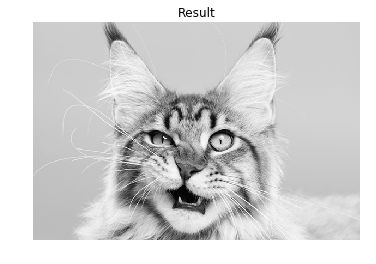

In [14]:
print_img(gray)

In [15]:
x_prewit = conv(gray, Prewitt_k_x, -765, 765)
print(x_prewit.dtype)
#scalling(x_prewit, -765, 765)

int64


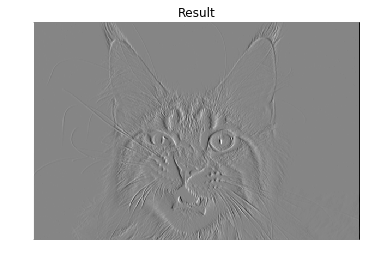

In [16]:
print_img(x_prewit)

int64


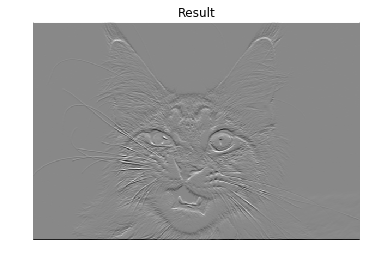

In [17]:
y_prewit = conv(gray, Prewitt_k_y, -765, 765)
print(x_prewit.dtype)
print_img(y_prewit)

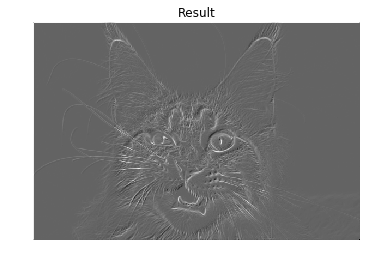

In [50]:
xy_prewit = np.maximum(x_prewit, y_prewit)
print_img(xy_prewit)

In [51]:
def treshold(image, base_value, final):
    image[image > base_value] = final

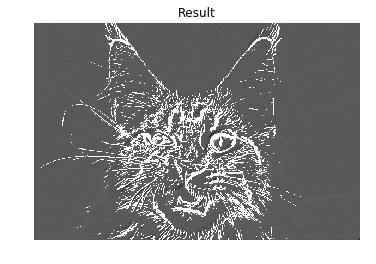

In [52]:
treshold(xy_prewit, 135, 255)
print_img(xy_prewit)

In [53]:
def under(image, base_value, final):
    image[image <= base_value] = final

In [54]:
under(xy_prewit, 135, 0)

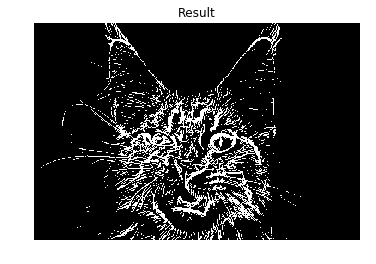

In [55]:
print_img(xy_prewit)

In [56]:
def selective_blur(image, borders, conv_m_size, conv_m_size2):
    img = image.copy()
    h, w = img.shape
    wrap = np.ones((h + conv_m_size, w + conv_m_size), dtype=np.uint8)
    wrap = img.mean() * wrap
    wrap2 = np.ones((h + conv_m_size2, w + conv_m_size2), dtype=np.uint8)
    wrap2 = img.mean() * wrap2
    pad = conv_m_size//2
    pad2 = conv_m_size2//2
    wrap[pad :pad + h,pad:pad + w ] = img
    wrap2[pad2 :pad2 + h,pad2:pad2 + w ] = img
    for i in range(h):
        for j in range(w):
            if borders[i,j] == 255:
                img[i,j] = np.sum(wrap2[i:i + pad2, j:j+pad2] * 1)//((pad2 *2) ** 2)
            else:
                img[i,j] = np.sum(wrap[i:i + pad, j:j+pad] * 1)//((pad *2) ** 2) 
    return img


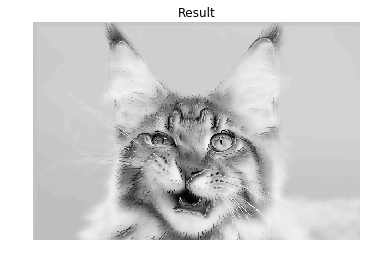

In [63]:
xy = selective_blur(gray, xy_prewit, 20, 2)
print_img(xy)